Popülasyon ile ilgili bir işlem yaparken, elimizde tüm popülasyon verileri olmayabilir yada dağınık bulunabilir.
Elimizdeki verilerden rastgele örneklem çekerek işlerimizi istatistik yardııyla bazı bilimsel kesinliklere dökerek
işlemler yapabiliriz. Testlerimizin türleri ve herbiri için istatistikçiler tarafından bulunmuş bazı test formülleri ve tabloları var.

Tablo değerlerini ve test formül istatiklerini python kendisi hallediyor.
Bizim bilmemiz gereken hangi durumlarda hangi hipotez testlerini uygulayacağız , hipotezleri nasıl kuracağız ve nasıl yorumlayacağız.

    Zaten hipotez testlerini unutmayalim ki ya betimsel istatistikler icin ya da oranlar icin uygulayabiliriz.

### Tek örneklem T testi : Tek bir gruba uygulayacağımız testtir.

        Varsayımlar : Normal dağılım , n > 30. 
        
        Ornek uygulama : Elimizde bazi kullanıcıların web sitemizde ortalama geçirdiği süreler var ve projenin
        başında hedeflediğimiz 170 saniyelik hedefe genel popülasyonun henüz ulaşıp ulaşmadığını test etmek
        istiyoruz.

    1.Adım: Hipotezlerin kurulması

    μ = 170
    μ ≠ 170

In [2]:
import numpy as np,seaborn as sns,pandas as pd

In [3]:
orneklem = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [4]:
orneklem.mean()

154.38

Goruldugu gibi orneklem ortalaması beklediğimiz değerden daha düşük. Yorumlama aşamasında kullanacağız.

    2.Adım : Varsayım kontrolü 
    
    1. n>30 kontrolü sağlanıyor.
    2. Normal dağılım
       -> Grafiklerle (histogram, qqplot)
       -> ama populasyondada bu sekilde oldugundan emin olmak icin Shapiro-Wilks testi yapilir.(test ici test)

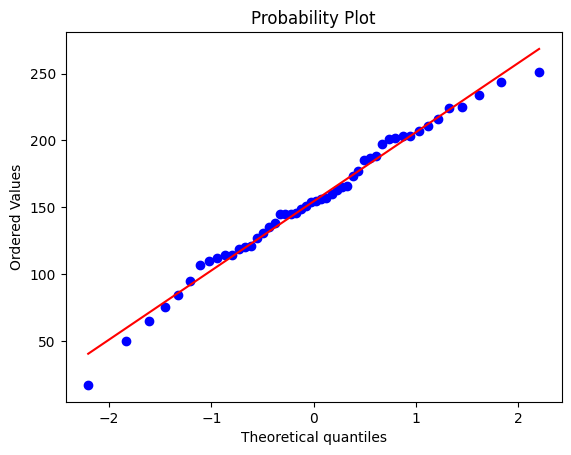

In [14]:
#qqplot
import pylab,scipy.stats as stats
stats.probplot(orneklem, dist="norm", plot=pylab)
pylab.show()

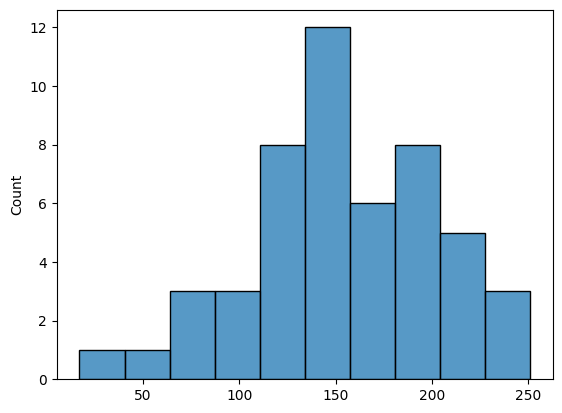

In [20]:
#histogram
sns.histplot(orneklem,bins=10);

    Shapiro-Wilks
    hipotezler: H0 = Orneklem ile populasyon arasinda normallikte anlamsal bir fark yoktur.
    H1 = Orneklem ile populasyon arasinda normallikte anlamsal bir fark vardır.

In [23]:
from scipy.stats import shapiro

In [24]:
test_istatistigi, p_value = shapiro(orneklem) 

In [25]:
p_value

0.7848551869392395

3 testtede normal dagilim oldugunu anlayabiliriz ve en son p value nun buyuk cikmasi ile garantiledik.

Yani artik normal varsayimlari karsilayan bir problemimiz var elimizde. Artik testi uygulayalim

In [26]:
result_testStatistic,result_pValue = stats.ttest_1samp(orneklem,popmean=170)

In [27]:
result_pValue

0.034460415195071446

Artık sonuç p değerimiz 0.05 ten küçük çıktığına göre ilk kurduğumuz H0 hipotezini reddediyoruz ve bu demekki
M = 170 hipotezimiz yanlıştır. Bundan %95 bilimsellikle eminiz. Ve ilk baktigimiz orneklem meani de 154 olduguna gore bunlari harmanlayip cikaracagimiz sonuc:
    
    Populasyonun ortalamasi %95 bilimsellikle 170 den kucuktur. Henuz hedefimize kesinlikle ulasamadik

## Peki varsayımlar sağlanmadıysa !!

In [28]:
from statsmodels.stats.descriptivestats import sign_test

In [29]:
sign_test(orneklem,170)

(-7.0, 0.06490864707227217)

Bu şekilde alınan p value değerine göre yorum yapacaktık.